# Имена младенцев в США (1880-2017)

Источник данных: https://www.ssa.gov/oact/babynames/limits.html

Cмотри `README.md` для дополнительных сведений.

> Данный учебный блокнот основан на примере, изложенном в книге *Wes McKinney - Python и анализ данных* (Глава 2. Первые примеры).

---

**Содержание**
1. [Данные для анализа](#Данные-для-анализа)
2. [Подготовка к работе](#Подготовка-к-работе)
3. [Первые шаги с DataFrame](#Первые-шаги-с-DataFrame)
4. [Дополнительные настройки](#Дополнительные-настройки)
5. [Анализируем информацию](#Анализируем-информацию)
6. [Больше данных](#Больше-данных)
7. [Визуализация](#Визуализация)
8. [Отчет](#Отчет)
9. [Домашнее задание](#Домашнее-задание)


## Данные для анализа

Уже распакованные данные, которые мы будем анализировать, расположены в `data/babynames/`. Чтобы проанализировать их структуру, воспользуемся командами `tree` и `head`.

```sh
$ tree data/babynames/
.
├── NationalReadMe.pdf
├── yob1880.txt
├── yob1881.txt
├── yob1882.txt
├── yob1883.txt
├── yob1884.txt
│   ...
└── yob2017.txt
```

```sh
$ head data/babynames/yob1880.txt 
Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288
```

Как видим, мы имеем дело с данными в формате [CSV](https://ru.wikipedia.org/wiki/CSV).

## Подготовка к работе

Импортируем модули библиотек NumPy, Pandas и Matplotlib, используя общепринятые сокращения.


In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from matplotlib import pyplot as plt

## Первые шаги с DataFrame

Рассмотрим сейчас для простоты только один из файлов. Для его преобразования в объект Pandas DataFrame (таблица с индексом) можно воспользоваться функцией `read_csv`. Дополнительно укажем заголовки для столбцов таблицы, поскольку исходный файл их не содержит.

In [4]:
names1880 = pd.read_csv('data/babynames/yob1880.txt', names=['name', 'sex', 'births'])

In [5]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


## Дополнительные настройки

Как видим, наши файлы достаточно большие. Ограничим количество строк для отображения в DataFrame. Здесь же добавим специальную опцию для последующего вывода графики в формуте `svg`.

In [4]:
pd.options.display.max_rows = 10
%config InlineBackend.figure_format = 'svg'

## Анализируем информацию

Сгруппируем нашу таблицу по столбцу 'sex', просуммировав при этом колличество новорожденных.

In [5]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110491
Name: births, dtype: int64

А также выведем список пяти самых популярных в этом году имен.

In [6]:
names1880.groupby('name').births.sum().nlargest(5)

name
John       9701
William    9562
Mary       7092
James      5949
Charles    5359
Name: births, dtype: int64

## Нужно больше данных

С одним лишь файлом `names1880.txt` работать весьма скучно. Загрузим все наши файлы в один общий объект DataFrame.

In [7]:
years = range(1880, 2018)

pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'data/babynames/yob{}.txt'.format(year)
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)

In [8]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1924660,Zykai,M,5,2017
1924661,Zykeem,M,5,2017
1924662,Zylin,M,5,2017
1924663,Zylis,M,5,2017


Теперь в нашей таблице уже четыре столбца (не считая индекса). Выведем количество новорожденных мальчиков и девочек по годам.

In [9]:
names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

sex,F,M
year,,
1880,90993,110491
1881,91953,100743
1882,107847,113686
1883,112319,104627
1884,129020,114442
...,...,...
2013,1750321,1886989
2014,1781072,1915239
2015,1778883,1909804


## Визуализция

Может быть пора уже что-нибудь нарисовать? Эти таблицы так утомительны для глаз.

Визуализировать данные мы будем при помощи библиотеки Matplotlib. Нужный нам модуль Matplotlib.pyplot уже был загружен под именем plt.

Полезные ссылки:
- https://matplotlib.org/
- https://matplotlib.org/gallery/index.html

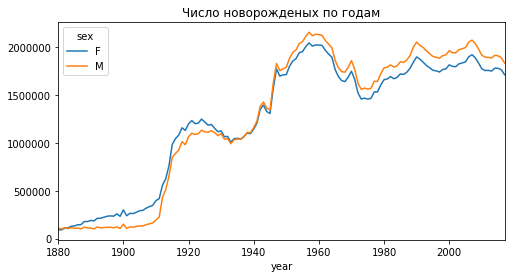

In [10]:
names.pivot_table('births', index='year', columns='sex', aggfunc=sum)\
    .plot(subplots=False, figsize=(8, 4), grid=False, title="Число новорожденых по годам")

Wikipedia: [Бэби-бум](https://ru.wikipedia.org/wiki/%D0%91%D0%B5%D0%B1%D0%B8-%D0%B1%D1%83%D0%BC).

Какие еще графики мы можем построить прямо сейчас? Мы уже видели, что наибольшее числе младенцев получили имя *John*. Посмотрим, сколько их было в разные годы.

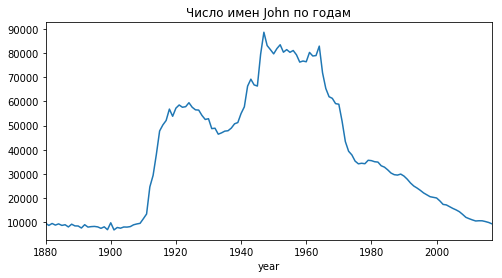

In [11]:
names[names['name'] == 'John']\
    .pivot_table('births', index='year', aggfunc=sum)\
    .plot(figsize=(8, 4), grid=False, title="Число имен John по годам")

## Отчет

Что-ж, мы проделали определенную работу и пришло время оформить отчет. Какием образом мы можем это сделать?

- Сам по себе блокнот Jupyter уже по сути является отчетом.
- Этот блокнот можно экспортировать во множество форматов через меню `File -> Download as` или при помощи утилиты `jupyter-nbconvert`.
- Можно "вручную" составить отчет при помощи удобного вам инстумента, скопировав вывод (ячейки `Out[]`) и добавив комментарии. 

### Воспроизводимость результатов

А что, если кто-либо захочет повторить нашу работу по шагам, проверить ее на корректность или изменить часть данных?

## Домашнее задание

1. При построении числа новорожденных по годам заменить аргумент `subplots=False` на `subplots=True`.
2. При построении графика количеств имен John добавит сетку (`grid`).

### Для любознательных

3. Построить таблицу, индексом которой является год, а единственным столбцом - отношение количества новорожденных с именем Jonh к общему количество рожденных в этот год. Построить график.  
